##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# What does a neural network learn?

### Setting up

**Notebook setup**. Select the "Edit" menu, then "Notebook settings". Choose "GPU" as the hardware accelerator. Check that "Omit code cell output..." is unchecked (so that the output is saved).

**Upload dataset** Select the folder icon from the left sidebar menu. Click the upload button and select the file "lab6data.zip" from your computer.

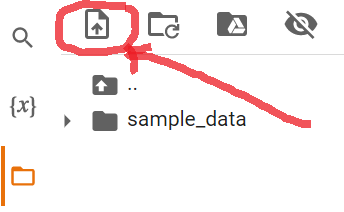

### Extract the dataset

In [ ]:
!unzip lab6data.zip

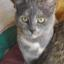

In [ ]:
from PIL import Image
im = Image.open("lab6/train/Cat/161.jpg")
display(im)

### Import TensorFlow

In [ ]:
import tensorflow as tf

from tensorflow.keras import layers, models


### Prepare the dataset for Keras

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory("lab6/train",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64))

Found 1800 files belonging to 2 classes.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory("lab6/test",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64))

Found 200 files belonging to 2 classes.


### Experiment 1: train a model from scratch

Follow the instructions in moodle. You can start adding code in cells below and running them by pressing the forward arrow button in the corner. Add more cells as needed.

In [ ]:
def make_cnn_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(2))
    return model

In [ ]:
model = make_cnn_model()

In [ ]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])
history = model.fit(train_ds, epochs=15)

In [ ]:
test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print(test_acc)

7/7 - 0s - loss: 0.6931 - accuracy: 0.5000 - 176ms/epoch - 25ms/step
0.5


Q1: What was the result (average accuracy of classifying cats and dogs in experiment 1)? Explain or comment the result. [it was 50% and the loss was 69%]

### Experiment 2: side channel data

In [4]:
!mkdir -p lab6/train2/Cat lab6/train2/Dog lab6/test2/Cat lab6/test2/Dog

In [10]:
import os
import os.path
from PIL import ImageDraw

def inject_text(ipath, opath, text):
    files = os.listdir(ipath)
    for fn in files:
        src = os.path.join(ipath, os.path.basename(fn))
        dest = os.path.join(opath, os.path.basename(fn))
        im = Image.open(src)
        canvas = ImageDraw.Draw(im)
        canvas.text((3,3), text, fill=(255, 0, 0))
        im.save(dest)

In [9]:
inject_text("lab6/train/Cat", "lab6/train2/Cat", "Cat")
inject_text("lab6/train/Dog", "lab6/train2/Dog", "Dog")
inject_text("lab6/test/Cat", "lab6/test2/Cat", "Cat")
inject_text("lab6/test/Dog", "lab6/test2/Dog", "Dog")
im = Image.open("lab6/train2/Cat/161.jpg")
display(im)

NameError: ignored

In [11]:
train_ds2 = tf.keras.preprocessing.image_dataset_from_directory("lab6/train2",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64))
test_ds2 = tf.keras.preprocessing.image_dataset_from_directory("lab6/test2",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64))

NameError: ignored

Q2: What was the result after injecting "hints" into images? Explain or comment the result. [for some reason an error popped up: NameError and even when i reuploaded the files it didn't work, inject_text("lab6/train/Cat", "lab6/train2/Cat", "Cat")]

### Experiment 3: adversarial data

In [12]:
!mkdir -p lab6/test3/Cat lab6/test3/Dog

In [13]:
inject_text("lab6/test/Cat", "lab6/test3/Cat", "Dog")
inject_text("lab6/test/Dog", "lab6/test3/Dog", "Cat")
im = Image.open("lab6/test3/Dog/10010.jpg")
display(im)

NameError: ignored

Q3: What was the result after reversing the captions on test images? Explain or comment the result. [same thing happend here]

### Experiment 4: transfer learning

In [14]:
base_model = tf.keras.applications.ResNet50(include_top=False)
base_model.trainable = False

def make_pretrained_model(base_model):
    inputs = tf.keras.Input(shape=(224, 224, 3))
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(2)(x)
    model = tf.keras.Model(inputs, outputs)
    return model

model4 = make_pretrained_model(base_model)

NameError: ignored

Q4: The ResNet50 model was trained with "Cat" and "Dog" captions placed correctly and tested with the captions reversed like in experiment 3. What happened? Explain or comment the result. [I don't know why it throws an error and im to tired to try to figure it out]